## Python Data Visualization Exam: Dash, Plotly, and Design Principles

### Instructions

**Goal:** Demonstrate your understanding of data visualization principles, design aesthetics, and your ability to implement them using the Dash and Plotly libraries in Python.

**Dataset:** The MBA dataset will be used throughout the exam.

**Tasks:** Complete the following tasks, following the provided instructions and guidelines. Ensure your code is well-structured, commented, and adheres to best practices. Pay close attention to the design principles and aesthetics of your visualizations.

**Grading:** The exam will be graded based on correctness, clarity, efficiency, adherence to design principles, and the overall visual appeal of your visualizations.

### Task 1: Data Exploration and Preprocessing (15 points)
* **Load the data:** Load the MBA dataset into a Pandas DataFrame.
* **Clean and preprocess:** Handle missing values, outliers, and inconsistencies as necessary.
* **Explore the data:** Use appropriate Plotly visualization techniques (e.g., histograms, box plots, scatter plots) to understand the distribution, relationships, and characteristics of the variables.

### Task 2: Creating a Dash App with Plotly Visualizations and Design (20 points)
* **Create a Dash app:** Set up a basic Dash app with a well-designed layout.
* **Integrate Plotly figures:** Use Plotly to create various visualizations (e.g., line charts, bar charts, scatter plots) and embed them into the Dash app.
* **Customize visualizations:** Modify the appearance, styling, and interactivity of the Plotly figures, ensuring they adhere to design principles like consistency, clarity, and aesthetics.

### Task 3: Visualizing Numeric Variables with Plotly and Design (10 points)
* **Create histograms:** Generate histograms with Plotly to visualize the distributions of numeric variables (e.g., GMAT score, GPA).
* **Customize histograms:** Adjust the bin size, color, and labels of the histograms while considering design principles like color contrast, font choice, and overall visual appeal.

### Task 4: Visualizing Categorical Variables with Plotly and Design (10 points)
* **Create bar charts:** Create bar charts with Plotly to visualize the frequency of categorical variables (e.g., program, gender).
* **Customize bar charts:** Modify the chart's orientation, color, and labels, ensuring they are visually appealing and easy to interpret.

### Task 5: Visualizing Relationships between Variables with Plotly and Design (10 points)
* **Create scatter plots:** Generate scatter plots with Plotly to explore the relationships between numeric variables (e.g., GMAT score vs. GPA).
* **Add trend lines:** Include trend lines (e.g., linear regression) to visualize the correlation between variables, considering the overall design and aesthetics of the plot.

### Task 6: Creating a Dashboard with Plotly, Dash, and Design Principles (10 points)
* **Combine visualizations:** Integrate multiple Plotly visualizations into a single dashboard layout using Dash.
* **Organize the dashboard:** Arrange the visualizations in a visually appealing and informative manner, adhering to design principles like balance, hierarchy, and white space.

**Additional Considerations:**
* **Color palette:** Choose a color palette that is visually pleasing, accessible, and consistent throughout your visualizations.
* **Typography:** Select fonts that are easy to read and complement the overall design.
* **Layout:** Ensure that the layout of your visualizations is balanced, well-organized, and easy to navigate.
* **Accessibility:** Consider accessibility guidelines when designing your visualizations to make them usable by people with disabilities.

# Task 1

In [32]:
# load MBA data set using pandas

import pandas as pd

full_data = pd.read_csv("MBA.csv")

In [33]:
# check the number of nulls in each column

full_data.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,1842
gmat,0
work_exp,0
work_industry,0
admission,5194


In [34]:
# change the NaN values to Other under the 'race' attribute

full_data['race'].fillna('Other', inplace=True)

# change the NaN value to Deny under the 'admission' attribute

full_data['admission'].fillna('Deny', inplace=True)

full_data.isnull().sum()

<ipython-input-34-be6041fab947>:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-34-be6041fab947>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


<Axes: xlabel='gmat'>

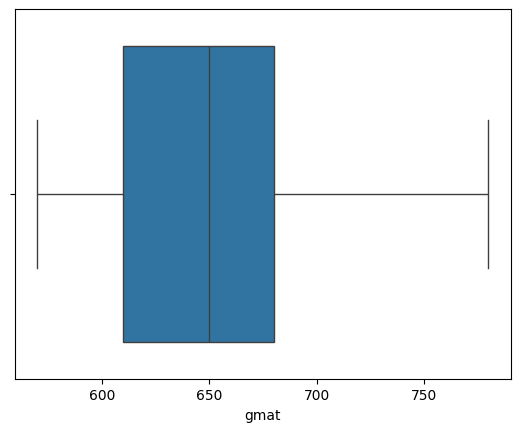

In [35]:
import seaborn as sns

# check for outliers in 'gmat' using boxplot
sns.boxplot(x=full_data['gmat'])

<Axes: xlabel='gpa'>

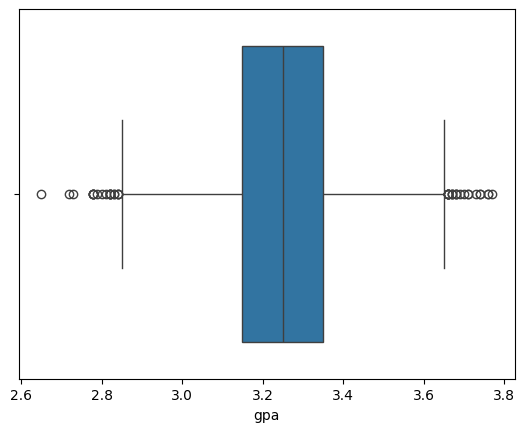

In [36]:
# check for outliers in 'gpa' using boxplot

sns.boxplot(x=full_data['gpa'])

<Axes: xlabel='gpa'>

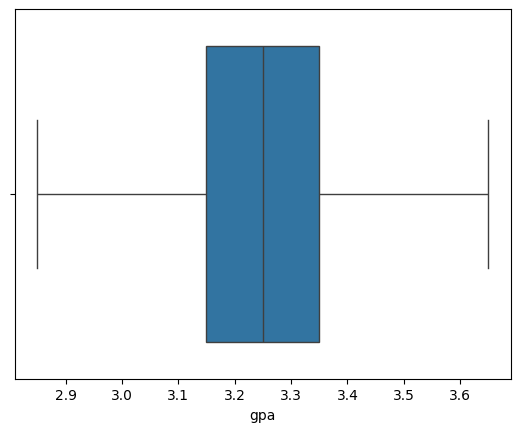

In [38]:
# remove outliers

import numpy as np

Q1 = full_data['gpa'].quantile(0.25)
Q3 = full_data['gpa'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(full_data['gpa'] >= upper)[0]
lower_array = np.where(full_data['gpa'] <= lower)[0]

full_data.drop(index=upper_array, inplace=True)
full_data.drop(index=lower_array, inplace=True)

sns.boxplot(x=full_data['gpa'])

<Axes: xlabel='work_exp'>

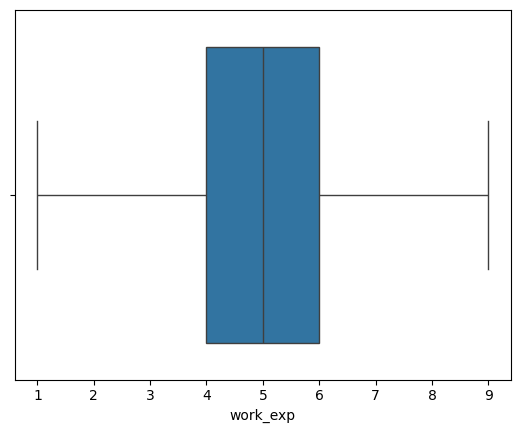

In [37]:
# check for outliers in 'work_exp' using boxplot

sns.boxplot(x=full_data['work_exp'])

In [44]:
# sample 1500 from the cleaned dataset

data = full_data.sample(1500).reset_index(drop=True)
data

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1410,Female,False,3.21,Business,Hispanic,570.0,6.0,Consulting,Deny
1,520,Female,False,3.18,Business,Black,600.0,5.0,Health Care,Deny
2,773,Female,True,2.90,STEM,Other,650.0,5.0,Technology,Waitlist
3,757,Male,True,3.00,Humanities,Other,670.0,4.0,Nonprofit/Gov,Deny
4,363,Male,False,3.16,STEM,Black,620.0,5.0,Consulting,Deny
...,...,...,...,...,...,...,...,...,...,...
1495,3820,Male,False,3.39,STEM,White,720.0,4.0,PE/VC,Deny
1496,2787,Male,False,3.12,STEM,Hispanic,590.0,7.0,Other,Deny
1497,532,Male,False,3.20,Business,Asian,610.0,5.0,PE/VC,Deny
1498,353,Female,False,3.47,Humanities,White,760.0,4.0,Technology,Admit


In [45]:
import plotly.express as px
import plotly.graph_objects as go

fig = px.histogram(data, x="gmat", nbins = 100)
fig.show()

In [47]:
fig = px.histogram(data, x="gpa", nbins = 200)
fig.show()

In [50]:
fig = px.histogram(data, x="work_exp")
fig.show()

In [51]:
fig = px.scatter(data, x="gmat", y="gpa")
fig.show()

# Task 2

In [54]:
!pip install dash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 52.1 MB/s eta 0:00:00


In [136]:
from dash import Dash, html, dash_table, dcc

# initialize the app
app = Dash(__name__)

# define the app layout
app.layout = html.Div([
    html.Div(children='data'),
    dash_table.DataTable(data=data.to_dict('records'), page_size=10)
])

# run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [137]:
# initialize the app
app = Dash(__name__)

# define the app layout
app.layout = html.Div([
    html.Div(children='data'),
    dash_table.DataTable(data=data.to_dict('records'), page_size=10),
    dcc.Graph(figure=px.scatter(data, x='gmat', y='gpa', trendline='ols')),
    dcc.Graph(figure=px.scatter(data, x='work_exp', y='gmat', trendline='ols')),
    dcc.Graph(figure=px.scatter(data, x='gpa', y='work_exp', trendline='ols')),
    dcc.Graph(figure=px.bar(data, x='gender', color='gender')),
    dcc.Graph(figure=px.bar(data, x='international', color='international')),
    dcc.Graph(figure=px.bar(data, x='major', color='major')),
    dcc.Graph(figure=px.bar(data, x='race', color='race')),
    dcc.Graph(figure=px.bar(data, x='work_industry', color='work_industry')),
    dcc.Graph(figure=px.bar(data, x='admission', color='admission'))
])

# run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

# Task 3

In [78]:
# create a histogram for gmat with appropriate customization

fig = px.histogram(data, x="gmat", nbins=100, color='admission')
fig.show()

In [80]:
# create histogram for gpa with appropriate customization

fig = px.histogram(gmat_sorted, x="gpa", nbins=200, color='admission')
fig.show()

In [81]:
# create histogram for work_exp with customization

fig = px.histogram(data, x="work_exp", nbins=50, color='admission')
fig.show()

# Task 4

In [99]:
# create a bar chart for 'gender' with customization

fig = px.bar(data, x='gender', color='gender', color_discrete_map={'Female': 'red', 'Male': 'blue'})
fig.show()

In [98]:
# create a bar chart for 'international' with appropriate customization

fig = px.bar(data, x='international', color='international')
fig.show()

In [101]:
# create a bar chart for 'major' with appropriate customization

fig = px.bar(data, x='major', color='major')
fig.show()

In [103]:
# create a bar chart for 'race' with appropriate customization

fig = px.bar(data, x='race', color='race')
fig.show()

In [111]:
# create a bar chart for 'work_industry' with appropriate customization

fig = px.bar(data, x='work_industry', color='work_industry')
fig.show()

In [106]:
# create a bar chart for 'admission' with appropriate customization

fig = px.bar(data, x='admission', color='admission')
fig.show()

# Task 5

In [127]:
# create a scatter plot for GPA vs. GMAT with overall trendline

fig = px.scatter(data, x='gpa', y='gmat', color='admission', trendline='ols', trendline_scope = 'overall')
fig.show()

In [126]:
# create a scatter plot for GPA vs. work_exp with overall trendline

fig = px.scatter(data, x='gpa', y='work_exp', color='admission', trendline='ols', trendline_scope = 'overall')
fig.show()

In [123]:
# create a scatter plot for work_exp vs. GMAT with trendline

fig = px.scatter(data, x='work_exp', y='gmat', color='admission', trendline='ols', trendline_scope = 'overall')
fig.show()

# Task 6

In [138]:
# initialize the app
app = Dash(__name__)

# define the app layout
app.layout = html.Div([
    html.Div(children='data'),
    dash_table.DataTable(data=data.to_dict('records'), page_size=10),
    dcc.Graph(figure=px.histogram(data, x="gmat", nbins=100, color='admission')),
    dcc.Graph(figure=px.histogram(data, x="gpa", nbins=200, color='admission')),
    dcc.Graph(figure=px.histogram(data, x="work_exp", nbins=50, color='admission')),
    dcc.Graph(figure=px.scatter(data, x='gmat', y='gpa', color='admission', trendline='ols', trendline_scope='overall')),
    dcc.Graph(figure=px.scatter(data, x='work_exp', y='gmat', color='admission', trendline='ols', trendline_scope='overall')),
    dcc.Graph(figure=px.scatter(data, x='gpa', y='work_exp', color='admission', trendline='ols', trendline_scope='overall')),
    dcc.Graph(figure=px.bar(data, x='gender', color='gender', color_discrete_map={'Female': 'red', 'Male': 'blue'})),
    dcc.Graph(figure=px.bar(data, x='international', color='international')),
    dcc.Graph(figure=px.bar(data, x='major', color='major')),
    dcc.Graph(figure=px.bar(data, x='race', color='race')),
    dcc.Graph(figure=px.bar(data, x='work_industry', color='work_industry')),
    dcc.Graph(figure=px.bar(data, x='admission', color='admission'))
])

# run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>